In [1]:
# %load /home/hwixley/Documents/Year3/IAML/cwk2/INFR10069-2020-CW2/helpers/iaml01cw2_helpers.py
#
#  Helper functions for IAML 2020/21 cw2
#
import os
import gzip
import numpy as np

#
#  This function is after  https://github.com/zalandoresearch/fashion-mnist
#
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

#
#------ IAML original functions ---------------
#
def load_FashionMNIST(data_path):
    Xtrn, Ytrn = load_mnist(data_path, "train")
    Xtst, Ytst = load_mnist(data_path, "t10k")
    return Xtrn.astype(np.float), Ytrn, Xtst.astype(np.float), Ytst

def load_CoVoST2(data_path):
    data = np.load(data_path+'/speech_trn.npz', allow_pickle=True)
    Xtrn, Ytrn = data['Xtrn'], data['Ytrn']
    data = np.load(data_path+'/speech_tst.npz', allow_pickle=True)
    Xtst, Ytst = data['Xtst'], data['Ytst']
    return Xtrn, Ytrn, Xtst, Ytst


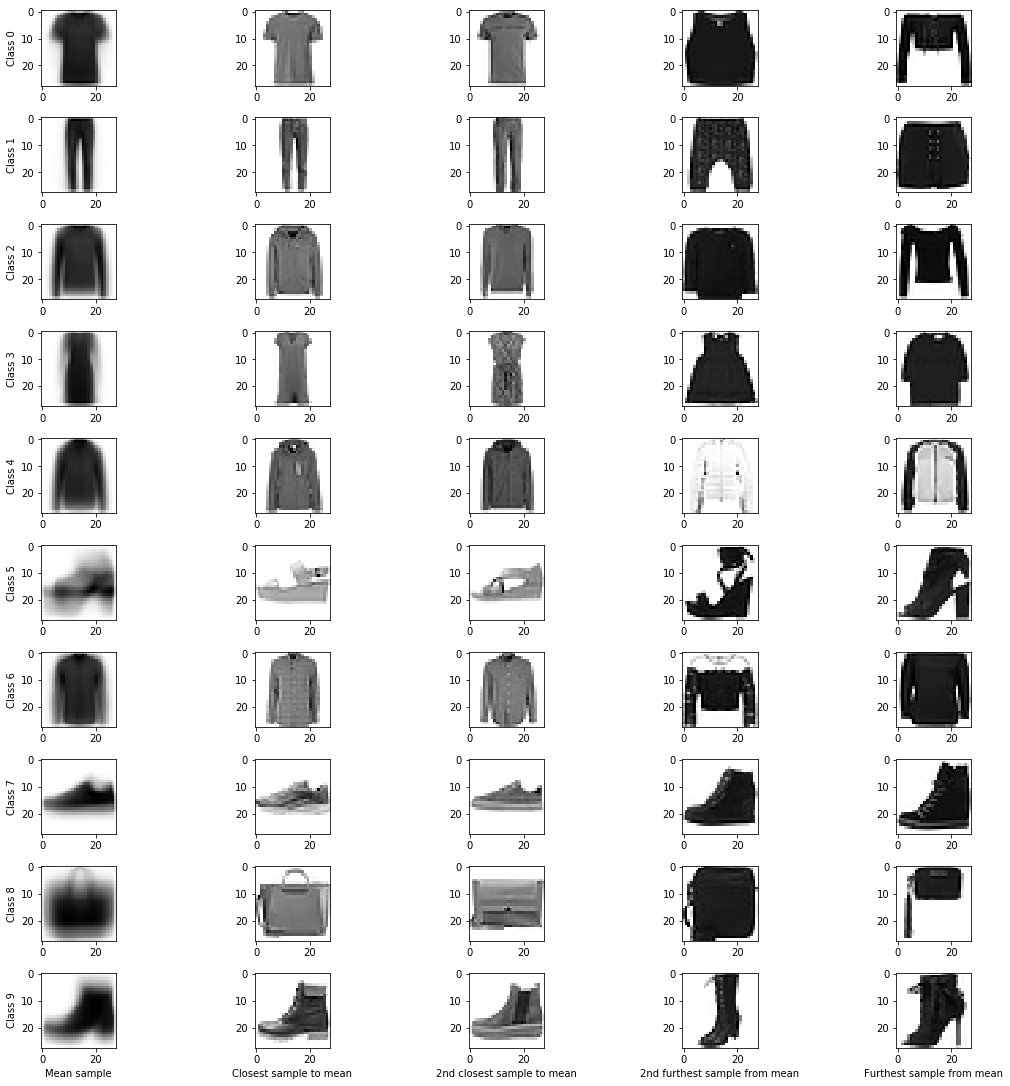

In [41]:

##########################################################
#  Python script template for Question 1 (IAML Level 10)
#  Note that
#  - You should not change the filename of this file, 'iaml01cw2_q1.py', which is the file name you should use when you submit your code for this question.
#  - You should define the functions shown below in your code.
#  - You can define function arguments (parameters) and returns (attributes) if necessary.
#  - In case you define helper functions, do not define them here, but put them in a separate Python module file, "iaml01cw2_my_helpers.py", and import it in this script.
#  - For those questions requiring you to show results in tables, your code does not need to present them in tables - just showing them with print() is fine.
#  - You do not need to include this header in your submission
##########################################################

#--- Code for loading the data set and pre-processing --->
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data:
Xtrn, Ytrn, Xtst, Ytst = load_FashionMNIST("/home/hwixley/Documents/Year3/IAML/cwk2/INFR10069-2020-CW2/data")
Xtrn_orig = Xtrn.copy
Xtst_orig = Xtst.copy
Xtrn = Xtrn/255
Xtst = Xtst/255

Xmean = Xtrn.mean(0)
Xtrn_nm = Xtrn - Xmean
Xtst_nm = Xtst - Xmean
#<----

# Q1.1
def iaml01cw2_q1_1():
    print(Xtrn_nm[0,0:4])
    print(Xtrn_nm[-1,0:4])
#
# iaml01cw2_q1_1()   # comment this out when you run the function

# Q1.2
def iaml01cw2_q1_2():
    classes = np.unique(Ytrn)
    classSamples = []
    images = []
    closest = []
    furthest = []
    classMeans = np.zeros((10,784))
    
    for c in classes:
        classSamples.append([])
        closest.append([])
        furthest.append([])
    
    # Add all the indexes of samples for a given classs in the classSamples list
    for row in range(Ytrn.size): 
        classSamples[Ytrn[row]].append(row)
    
    for c in range(10):
        samples = classSamples[c]
        
        #Calculate the mean samples for each class
        for index in samples:
            classMeans[c] += Xtrn[index,:]
            
        classMeans[c] = classMeans[c]/len(samples)
        imageC = classMeans[c].reshape(28,28)
        images.append(imageC)
        
        #Calculate closest samples
        close1 = -1
        closeDist1 = 10000
        close2 = -1
        closeDist2 = 10000
        #Calculate furthest samples
        far1 = -1
        farDist1 = 0
        far2 = -1
        farDist2 = 0
        
        for index in samples:
            dist = sum((classMeans[c]-Xtrn[index,:])**2)
            
            if dist < closeDist1:
                close1 = index
                closeDist1 = dist
            elif dist < closeDist2:
                close2 = index
                closeDist2 = dist
                
            if dist > farDist1:
                far1 = index
                farDist1 = dist
            elif dist > farDist2:
                far2 = index
                farDist2 = dist
                
        closest[c].append(close1)
        closest[c].append(close2)
        furthest[c].append(far1)
        furthest[c].append(far2)
    
    
    fig, axs = plt.subplots(10,5,figsize=(15,15))
    fig.tight_layout()
    for i in range(10):
        axs[i,0].imshow(images[i], cmap="gray_r")
        axs[i,0].set(ylabel = "Class " + str(i))
        axs[i,1].imshow(Xtrn[closest[i][0],:].reshape(28,28), cmap="gray_r")
        axs[i,2].imshow(Xtrn[closest[i][1],:].reshape(28,28), cmap="gray_r")
        axs[i,3].imshow(Xtrn[furthest[i][1],:].reshape(28,28), cmap="gray_r")
        axs[i,4].imshow(Xtrn[furthest[i][0],:].reshape(28,28), cmap="gray_r")
    axs[9,0].set(xlabel = "Mean sample")
    axs[9,1].set(xlabel = "Closest sample to mean")
    axs[9,2].set(xlabel = "2nd closest sample to mean")
    axs[9,3].set(xlabel = "2nd furthest sample from mean")
    axs[9,4].set(xlabel = "Furthest sample from mean")
            
                
#
iaml01cw2_q1_2()   # comment this out when you run the function

# Q1.3
#def iaml01cw2_q1_3():
#
# iaml01cw2_q1_3()   # comment this out when you run the function


# Q1.4
#def iaml01cw2_q1_4():
#
# iaml01cw2_q1_4()   # comment this out when you run the function


# Q1.5
#def iaml01cw2_q1_5():
#
# iaml01cw2_q1_5()   # comment this out when you run the function


# Q1.6
#def iaml01cw2_q1_6():
#
# iaml01cw2_q1_6()   # comment this out when you run the function


# Q1.7
#def iaml01cw2_q1_7():
#
# iaml01cw2_q1_7()   # comment this out when you run the function


# Q1.8
#def iaml01cw2_q1_8():
#
# iaml01cw2_q1_8()   # comment this out when you run the function
